# CAT AND DOG IMAGE CLASSIFICATION USING CNN

In [1]:
# Importing necessary libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import cv2

In [2]:
sample_cat = cv2.imread('CATS_DOGS/train/CAT/12.jpg')
sample_cat = cv2.cvtColor(sample_cat, cv2.COLOR_BGR2RGB)

In [3]:
sample_dog = cv2.imread('CATS_DOGS/train/DOG/24.jpg')
sample_dog = cv2.cvtColor(sample_dog, cv2.COLOR_BGR2RGB)

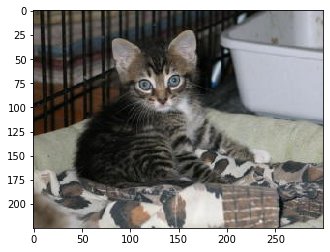

In [4]:
plt.imshow(sample_cat)

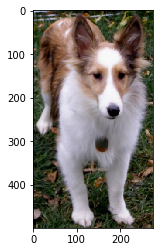

In [5]:
plt.imshow(sample_dog)

In [6]:
sample_cat.shape

(225, 300, 3)

In [7]:
sample_dog.shape

(500, 275, 3)

 * Generating images using Image Data Generator

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale = 1/255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

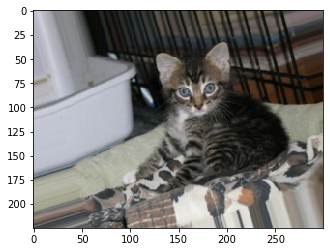

In [10]:
plt.imshow(image_gen.random_transform(sample_cat))

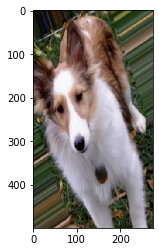

In [11]:
plt.imshow(image_gen.random_transform(sample_dog))

<b> Assigning directories for data flow </b>



In [12]:
image_gen.flow_from_directory('CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [13]:
image_gen.flow_from_directory('CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


In [14]:
image_shape = (150,150,3)

<b>BUILDING THE CONVOLUTIONAL NEURAL NETWORK</b>

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout

In [16]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(150,150,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
batch_size = 16

# TRAIN IMAGE GENERATOT

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [19]:
# TEST IMAGE GENERATOR

test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [20]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [21]:
import warnings
warnings.filterwarnings('ignore')

<b> FITTING THE MODEL </b>

In [ ]:
results = model.fit_generator(train_image_gen,epochs=30,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

In [24]:
results.history['accuracy']

[0.52458334,
 0.55125,
 0.5566667,
 0.56125,
 0.59041667,
 0.5930573,
 0.60125,
 0.6408333,
 0.63958335,
 0.6578837,
 0.66375,
 0.64875,
 0.67625,
 0.705,
 0.67041665,
 0.67,
 0.7083333,
 0.71166664,
 0.69625,
 0.7245833,
 0.7227102,
 0.7108333,
 0.73375,
 0.7295833,
 0.73,
 0.73625,
 0.7504167,
 0.75,
 0.7608333,
 0.755]

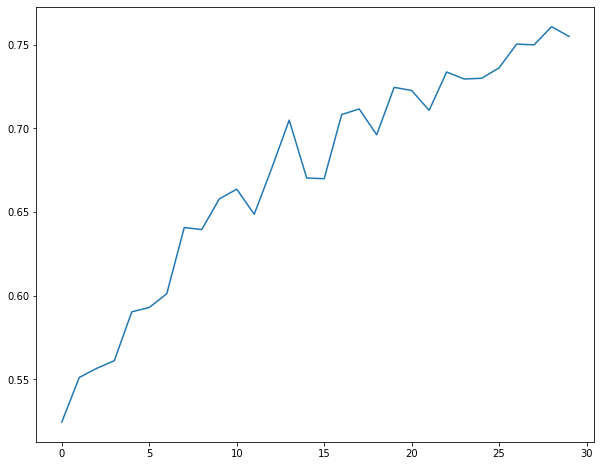

In [25]:
plt.figure(figsize=(10,8))
plt.plot(results.history['accuracy'])   # ACCURACY CURVE

In [40]:
import numpy as np
from tensorflow.keras.preprocessing import image

dog = cv2.imread('CATS_DOGS/train/Dog/200.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

dog_file = 'CATS_DOGS/train/Dog/200.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [41]:
prediction_prob = model.predict(dog_img)

In [42]:
# Output prediction

print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.81165934]] 


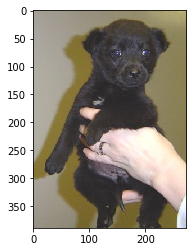

In [43]:
plt.imshow(dog)

# THE END